In [524]:
import pandas as pd
import seaborn as sns
import numpy as np

titanic_info = pd.read_csv('./data/train.csv')
test_submission = pd.read_csv('./data/test.csv')

titanic_info.head(5)

titanic_info.loc[titanic_info['Cabin'] == 'A24']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S


Percentage women survived:  74.20382165605095
Percentage men survived:  18.890814558058924


/anaconda3/envs/DNAI_ENV/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


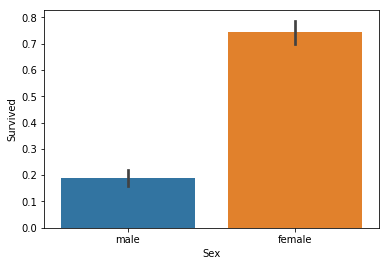

In [474]:
print('Percentage women survived: ', titanic_info["Survived"][titanic_info["Sex"] == 'female'].value_counts(normalize=True)[1]*100)
print('Percentage men survived: ', titanic_info["Survived"][titanic_info["Sex"] == 'male'].value_counts(normalize=True)[1]*100)

sns.barplot(x='Sex', y='Survived', data=titanic_info)

As we can see, there is more women who survived than men.
There is probably a relation between women and survived.

Child  0.16666666666666666
Teenager  0.6666666666666666
Student  0.34375
Young Adult  0.4


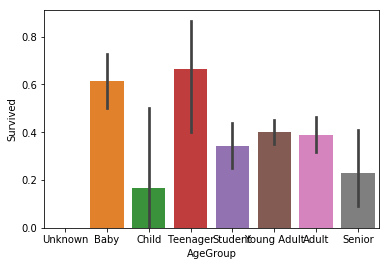

In [475]:
bins = [-1, 0, 9, 11, 15, 20, 36, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

titanic_info['AgeGroup'] = pd.cut(titanic_info['Age'], bins=bins, labels=labels)
test_submission['AgeGroup'] = pd.cut(test_submission['Age'], bins=bins, labels=labels)
print('Child ', titanic_info[titanic_info['AgeGroup'] == 'Child']['Survived'].value_counts(normalize=True)[1])
print('Teenager ', titanic_info[titanic_info['AgeGroup'] == 'Teenager']['Survived'].value_counts(normalize=True)[1])
print('Student ', titanic_info[titanic_info['AgeGroup'] == 'Student']['Survived'].value_counts(normalize=True)[1])
print('Young Adult ', titanic_info[titanic_info['AgeGroup'] == 'Young Adult']['Survived'].value_counts(normalize=True)[1])

sns.barplot(x='AgeGroup', y='Survived', data=titanic_info)

It seems that Baby as more chance to suvived than Senior.

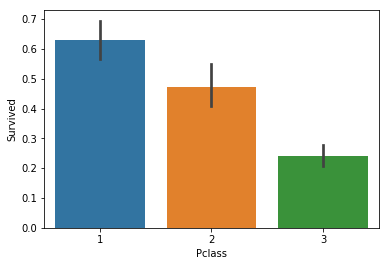

In [476]:
sns.barplot(x='Pclass', y='Survived', data=titanic_info)

Upper class has a higher survived rate than Lower class

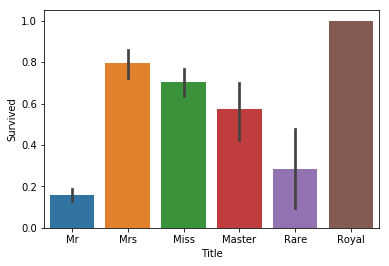

In [477]:
titanic_info['Title'] = titanic_info['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_info['Title'] = titanic_info['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
titanic_info['Title'] = titanic_info['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
titanic_info['Title'] = titanic_info['Title'].replace('Mlle', 'Miss')
titanic_info['Title'] = titanic_info['Title'].replace('Ms', 'Miss')
titanic_info['Title'] = titanic_info['Title'].replace('Mme', 'Mrs')

test_submission['Title'] = test_submission['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_submission['Title'] = test_submission['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test_submission['Title'] = test_submission['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test_submission['Title'] = test_submission['Title'].replace('Mlle', 'Miss')
test_submission['Title'] = test_submission['Title'].replace('Ms', 'Miss')
test_submission['Title'] = test_submission['Title'].replace('Mme', 'Mrs')

sns.barplot(x='Title', y='Survived', data=titanic_info)

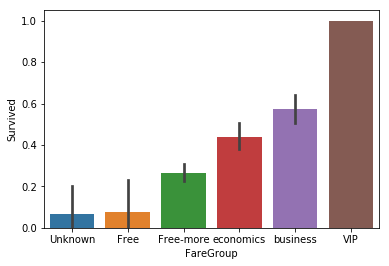

In [478]:
bins=[-1, 0, 7, 14, 31, 300, np.inf]
labels=['Unknown', 'Free', 'Free-more', 'economics', 'business', 'VIP']

titanic_info['FareGroup'] = pd.cut(titanic_info['Fare'], bins=bins, labels=labels)
test_submission['FareGroup'] = pd.cut(test_submission['Fare'], bins=bins, labels=labels)

sns.barplot(x='FareGroup', y='Survived', data=titanic_info)

VIP class give you more chance to survived.

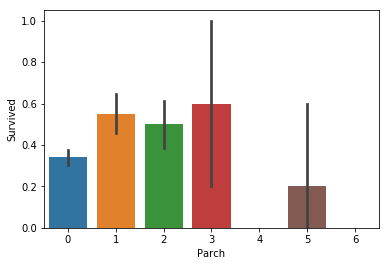

In [479]:
sns.barplot(x='Parch', y='Survived', data=titanic_info)

People between 1 and 3 children or parent have more chance to survived than people with 4 or more children or family.
People alone have less chance to survived than people between 1 and 3 parents.

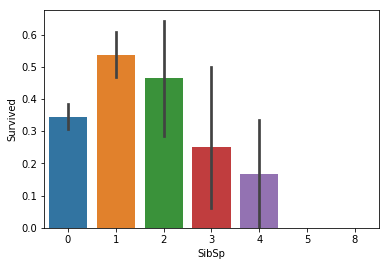

In [480]:
titanic_info['SibSp'].value_counts()

sns.barplot(x='SibSp', y='Survived', data=titanic_info)

People with 1 or 2 siblings / spouses have more chance to live than people with 0, 3, 4, 5, 8 siblings / spouses.

[6, 5, 7, 32, 31, 19, 34, 14, 16, 10, 20, 23, 26, 36, 24]


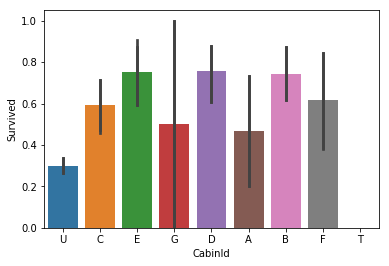

In [495]:
titanic_info['Cabin'].fillna('U0', inplace=True)
#print(titanic_info['Cabin'])
data = titanic_info['Cabin'].str.split()
cabins_id = []
cabins_nbr = []
test_nbr = []

for cabin in data:
    cabins_id.append(cabin[0][0:1])
    try:
        cabins_nbr.append(int(cabin[0][1:]))
        if cabin[0][0:1] == 'A':
            test_nbr.append(int(cabin[0][1:]))

    except ValueError:
        cabins_nbr.append(int(0))
        
print(test_nbr)        
test_submission['Cabin'].fillna('U0', inplace=True)
data_sub = test_submission['Cabin'].str.split()
cabins_id_sub = []
cabins_nbr_sub = []
for cabin in data_sub:
    cabins_id_sub.append(cabin[0][0:1])
    try:
        cabins_nbr_sub.append(int(cabin[0][1:]))
    except ValueError:
        cabins_nbr_sub.append(int(0))
    
#print(cabins_nbr)


labels2=['0', '1', '42', '123', '310']
bins2=[0, 1, 42, 123, 310, np.inf]
titanic_info['CabinValue'] = cabins_nbr
#print(titanic_info['CabinValue'])
titanic_info['CabinValue'] = pd.cut(titanic_info['CabinValue'], bins=bins2, labels=labels2)
titanic_info['CabinValue'].fillna('0', inplace=True)
#print(titanic_info['CabinValue'])
titanic_info['CabinId'] = cabins_id


test_submission['CabinValue'] = cabins_nbr_sub
test_submission['CabinValue'] = pd.cut(test_submission['CabinValue'], bins=bins2, labels=labels2)
test_submission['CabinId'] = cabins_id_sub
test_submission['CabinValue'].fillna('0', inplace=True)

#titanic_info['CabinValue'] = titanic_info['Cabin'].isnull().astype(int)
#test_submission['CabinValue'] = test_submission['Cabin'].isnull().astype(int)
sns.barplot(x='CabinId', y='Survived', data=titanic_info)
titanic_info['CabinValue']
#sns.barplot(x='CabinTest', y='Survived', data=titanic_info)
sns.barplot(x='CabinId', y='Survived', data=titanic_info)

People with cabin have more chance to survive than people without cabin.

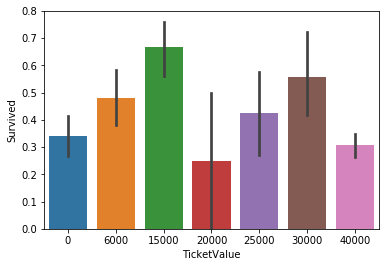

In [482]:
#print(titanic_info[titanic_info['Ticket'] == 'LINE']['Survived'].value_counts(normalize=True)[0])
data = titanic_info['Ticket'].str.split()
nbr = []

for places in data:
    try:
        if len(places) > 1:
            #print('---', places[1])
            nbr.append(int(places[1]))
        else:
            nbr.append(int(places[0]))
    except ValueError:
        nbr.append(1)
        pass

nbr_submission = []
data_submission = test_submission['Ticket'].str.split()
for places in data_submission:
    try:
        if len(places) > 1:
            #print('---', places[1])
            nbr_submission.append(int(places[1]))
        else:
            nbr_submission.append(int(places[0]))
    except ValueError:
        nbr_submission.append(1)
        pass

titanic_info['ticket_number'] = nbr
test_submission['ticket_number'] = nbr_submission

bins=[0,  6000, 15000, 20000, 25000, 30000, 40000, np.inf]
labels=['0',  '6000', '15000', '20000', '25000', '30000', '40000']
titanic_info['TicketValue'] = pd.cut(titanic_info['ticket_number'], bins=bins, labels=labels)
test_submission['TicketValue'] = pd.cut(test_submission['ticket_number'], bins=bins, labels=labels)

sns.barplot(x='TicketValue', y='Survived', data=titanic_info)
#sns.barplot(x='ticket_number', y='Survived', data=titanic_info)

#titanic_info.head(5)
#titanic_info['ticket_number'].dtype
#print(len(data))
#print(titanic_info.loc[1])
#print(titanic_info.loc[867])
#print (len(titanic_info))
#print(titanic_info['Ticket'].value_counts())

In [483]:
#Sex

titanic_info['Sex'].replace('male', 1, inplace=True)
titanic_info['Sex'].replace('female', 2, inplace=True)


test_submission['Sex'].replace('male', 1, inplace=True)
test_submission['Sex'].replace('female', 2, inplace=True)

#AgeGroup
titanic_info['AgeGroup'].fillna('Unknown', inplace=True)
titanic_info['AgeGroup'].replace('Unknown', 1, inplace=True)
titanic_info['AgeGroup'].replace('Baby', 2, inplace=True)
titanic_info['AgeGroup'].replace('Child', 3, inplace=True)
titanic_info['AgeGroup'].replace('Teenager', 4, inplace=True)
titanic_info['AgeGroup'].replace('Student', 5, inplace=True)
titanic_info['AgeGroup'].replace('Young Adult', 6, inplace=True)
titanic_info['AgeGroup'].replace('Adult', 7, inplace=True)
titanic_info['AgeGroup'].replace('Senior', 8, inplace=True)

test_submission['AgeGroup'].fillna('Unknown', inplace=True)
test_submission['AgeGroup'].replace('Unknown', 1, inplace=True)
test_submission['AgeGroup'].replace('Baby', 2, inplace=True)
test_submission['AgeGroup'].replace('Child', 3, inplace=True)
test_submission['AgeGroup'].replace('Teenager', 4, inplace=True)
test_submission['AgeGroup'].replace('Student', 5, inplace=True)
test_submission['AgeGroup'].replace('Young Adult', 6, inplace=True)
test_submission['AgeGroup'].replace('Adult', 7, inplace=True)
test_submission['AgeGroup'].replace('Senior', 8, inplace=True)

#FareGroup
titanic_info['FareGroup'].fillna('Unknown', inplace=True)
titanic_info['FareGroup'].replace('Unknown', 1, inplace=True)
titanic_info['FareGroup'].replace('Free', 2, inplace=True)
titanic_info['FareGroup'].replace('Free-more', 3, inplace=True)
titanic_info['FareGroup'].replace('economics', 4, inplace=True)
titanic_info['FareGroup'].replace('business', 5, inplace=True)
titanic_info['FareGroup'].replace('VIP', 6, inplace=True)

test_submission['FareGroup'].fillna('Unknown', inplace=True)
test_submission['FareGroup'].replace('Unknown', 1, inplace=True)
test_submission['FareGroup'].replace('Free', 2, inplace=True)
test_submission['FareGroup'].replace('Free-more', 3, inplace=True)
test_submission['FareGroup'].replace('economics', 4, inplace=True)
test_submission['FareGroup'].replace('business', 5, inplace=True)
test_submission['FareGroup'].replace('VIP', 6, inplace=True)

#Title
titanic_info['Title'].replace('Rare', 1, inplace=True)
titanic_info['Title'].replace('Royal', 2, inplace=True)
titanic_info['Title'].replace('Miss', 3, inplace=True)
titanic_info['Title'].replace('Miss', 4, inplace=True)
titanic_info['Title'].replace('Mrs', 5, inplace=True)
titanic_info['Title'].replace('Mr', 6, inplace=True)
titanic_info['Title'].replace('Master', 7, inplace=True)

test_submission['Title'].replace('Rare', 1, inplace=True)
test_submission['Title'].replace('Royal', 2, inplace=True)
test_submission['Title'].replace('Miss', 3, inplace=True)
test_submission['Title'].replace('Miss', 4, inplace=True)
test_submission['Title'].replace('Mrs', 5, inplace=True)
test_submission['Title'].replace('Mr', 6, inplace=True)
test_submission['Title'].replace('Master', 7, inplace=True)

#TicketValue
titanic_info['TicketValue'].replace('0', 1, inplace=True)
titanic_info['TicketValue'].replace('6000', 2, inplace=True)
titanic_info['TicketValue'].replace('15000', 3, inplace=True)
titanic_info['TicketValue'].replace('20000', 4, inplace=True)
titanic_info['TicketValue'].replace('25000', 5, inplace=True)
titanic_info['TicketValue'].replace('30000', 6, inplace=True)
titanic_info['TicketValue'].replace('40000', 7, inplace=True)

test_submission['TicketValue'].replace('0', 1, inplace=True)
test_submission['TicketValue'].replace('6000', 2, inplace=True)
test_submission['TicketValue'].replace('15000', 3, inplace=True)
test_submission['TicketValue'].replace('20000', 4, inplace=True)
test_submission['TicketValue'].replace('25000', 5, inplace=True)
test_submission['TicketValue'].replace('30000', 6, inplace=True)
test_submission['TicketValue'].replace('40000', 7, inplace=True)

#Cabin
titanic_info['CabinValue'].replace('0', 1, inplace=True)
titanic_info['CabinValue'].replace('1', 2, inplace=True)
titanic_info['CabinValue'].replace('42', 3, inplace=True)
titanic_info['CabinValue'].replace('123', 4, inplace=True)
titanic_info['CabinValue'].replace('310', 5, inplace=True)

test_submission['CabinValue'].replace('0', 1, inplace=True)
test_submission['CabinValue'].replace('1', 2, inplace=True)
test_submission['CabinValue'].replace('42', 3, inplace=True)
test_submission['CabinValue'].replace('123', 4, inplace=True)
test_submission['CabinValue'].replace('310', 5, inplace=True)

titanic_info['CabinId'].replace('U', 1, inplace=True)
titanic_info['CabinId'].replace('C', 2, inplace=True)
titanic_info['CabinId'].replace('E', 3, inplace=True)
titanic_info['CabinId'].replace('G', 4, inplace=True)
titanic_info['CabinId'].replace('A', 5, inplace=True)
titanic_info['CabinId'].replace('B', 6, inplace=True)
titanic_info['CabinId'].replace('F', 7, inplace=True)
titanic_info['CabinId'].replace('D', 9, inplace=True)
titanic_info['CabinId'].replace('T', 8, inplace=True)

test_submission['CabinId'].replace('U', 1, inplace=True)
test_submission['CabinId'].replace('C', 2, inplace=True)
test_submission['CabinId'].replace('E', 3, inplace=True)
test_submission['CabinId'].replace('G', 4, inplace=True)
test_submission['CabinId'].replace('A', 5, inplace=True)
test_submission['CabinId'].replace('B', 6, inplace=True)
test_submission['CabinId'].replace('F', 7, inplace=True)
test_submission['CabinId'].replace('D', 9, inplace=True)
test_submission['CabinId'].replace('T', 8, inplace=True)

titanic_info.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FareGroup,CabinValue,CabinId,ticket_number,TicketValue
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,S,6,6,3,1,1,21171,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,7,5,5,3,2,17599,3
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,6,3,3,1,1,3101282,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,6,5,5,3,2,113803,7
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,S,6,6,3,1,1,373450,7


In [484]:
titanic_info = titanic_info.drop(labels=['Name', 'Cabin', 'Ticket', 'Embarked', 'Age', 'Fare', 'PassengerId', 'ticket_number', 'TicketValue', 'CabinId', 'CabinValue'], axis=1)
test_submission = test_submission.drop(labels=['Name', 'Cabin', 'Ticket', 'Embarked', 'Age', 'Fare', 'ticket_number', 'TicketValue', 'CabinId', 'CabinValue'], axis=1)
titanic_info['Title'].value_counts()

6    517
3    185
5    126
7     40
1     21
2      2
Name: Title, dtype: int64

In [485]:
#titanic_info.dtypes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

targets = titanic_info['Survived']
placeholders = titanic_info.drop(['Survived'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(placeholders, targets, test_size = 0.22, random_state = 0)

titanic_info.head(5)

,Survived,Pclass,Sex,SibSp,Parch,AgeGroup,Title,FareGroup
0,0,3,1,1,0,6,6,3
1,1,1,2,1,0,7,5,5
2,1,3,2,0,0,6,3,3
3,1,1,2,1,0,6,5,5
4,0,3,1,0,0,6,6,3


In [486]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

82.23


In [487]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

80.2


/anaconda3/envs/DNAI_ENV/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [488]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [489]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

80.71


/anaconda3/envs/DNAI_ENV/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [490]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

79.7


In [491]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.74


In [462]:
ids = test_submission['PassengerId']
test_submission.head(155)
predictions = gbk.predict(test_submission.drop('PassengerId', axis=1))
#test_submission.describe()

#set the output as a dataframe and convert to csv file named submission.csv
print(predictions)
output = pd.DataFrame({'PassengerId' : ids, 'Survived': predictions})
output.to_csv('submission4.csv', index=False)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]
